## Alzheimer Disease

### Import libs

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import numpy as np
from scipy import stats

import warnings 

# Suppress all warnings
warnings.filterwarnings('ignore')

# Remove warning
warnings.simplefilter('ignore')


# Set option of DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.width', 100)

# Set theme for plotting
sns.set_theme(style='darkgrid', palette='coolwarm', rc={'figure.figsize' :(15,10)})


from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix



In [3]:
alzheimer_df = pd.read_csv("alzheimers_disease_data.csv")
alzheimer_df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,7.535540,0,0,0,0,0,0,122,101,280.476824,94.870490,60.943092,234.520123,1.201190,0.238667,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,8.555256,0,0,0,0,0,0,152,106,186.384436,95.410700,93.649735,367.986877,6.458060,8.687480,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,5.769464,0,0,0,0,0,0,115,118,237.024558,156.267294,99.678209,294.802338,17.011003,1.972137,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,0,1,0,0,0,0,103,96,242.197192,52.482961,81.281111,145.253746,4.030491,5.173891,0,0,3.785399,0,0,0,0,1,1,XXXConfid


In [4]:
alzheimer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

### Categorical and Numerical features selection (manually)

In [5]:
# 18 categorical features
categorical_features = ['Gender',
                     'Ethnicity',
                     'EducationLevel',
                     'Smoking',
                     'FamilyHistoryAlzheimers',
                     'CardiovascularDisease',
                     'Diabetes',
                     'Depression',
                     'HeadInjury',
                     'Hypertension',
                     'MemoryComplaints',
                     'BehavioralProblems',
                     'Confusion',
                     'Disorientation',
                     'PersonalityChanges',
                     'DifficultyCompletingTasks',
                     'Forgetfulness',
                     'Diagnosis']

# 15 numerical features
numerical_features = ['Age',     
                      'BMI',
                      'AlcoholConsumption',
                      'PhysicalActivity',
                      'DietQuality',
                      'SleepQuality',
                      'SystolicBP',
                      'DiastolicBP',
                      'CholesterolTotal',
                      'CholesterolLDL',
                      'CholesterolHDL',
                      'CholesterolTriglycerides',
                      'MMSE',
                      'FunctionalAssessment',
                      'ADL']


alzheimer_df[numerical_features] = alzheimer_df[numerical_features].astype('float')
alzheimer_df[categorical_features] = alzheimer_df[categorical_features].astype('category')

### Remove irrelevant features

In [6]:
# Drop PatientID and DoctorInCharge
alzheimer_df.drop(inplace=True, columns={'DoctorInCharge', 'PatientID'})

alzheimer_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Age                        2149 non-null   float64 
 1   Gender                     2149 non-null   category
 2   Ethnicity                  2149 non-null   category
 3   EducationLevel             2149 non-null   category
 4   BMI                        2149 non-null   float64 
 5   Smoking                    2149 non-null   category
 6   AlcoholConsumption         2149 non-null   float64 
 7   PhysicalActivity           2149 non-null   float64 
 8   DietQuality                2149 non-null   float64 
 9   SleepQuality               2149 non-null   float64 
 10  FamilyHistoryAlzheimers    2149 non-null   category
 11  CardiovascularDisease      2149 non-null   category
 12  Diabetes                   2149 non-null   category
 13  Depression                 2149 n

### Missing Value & Duplicate

<Axes: >

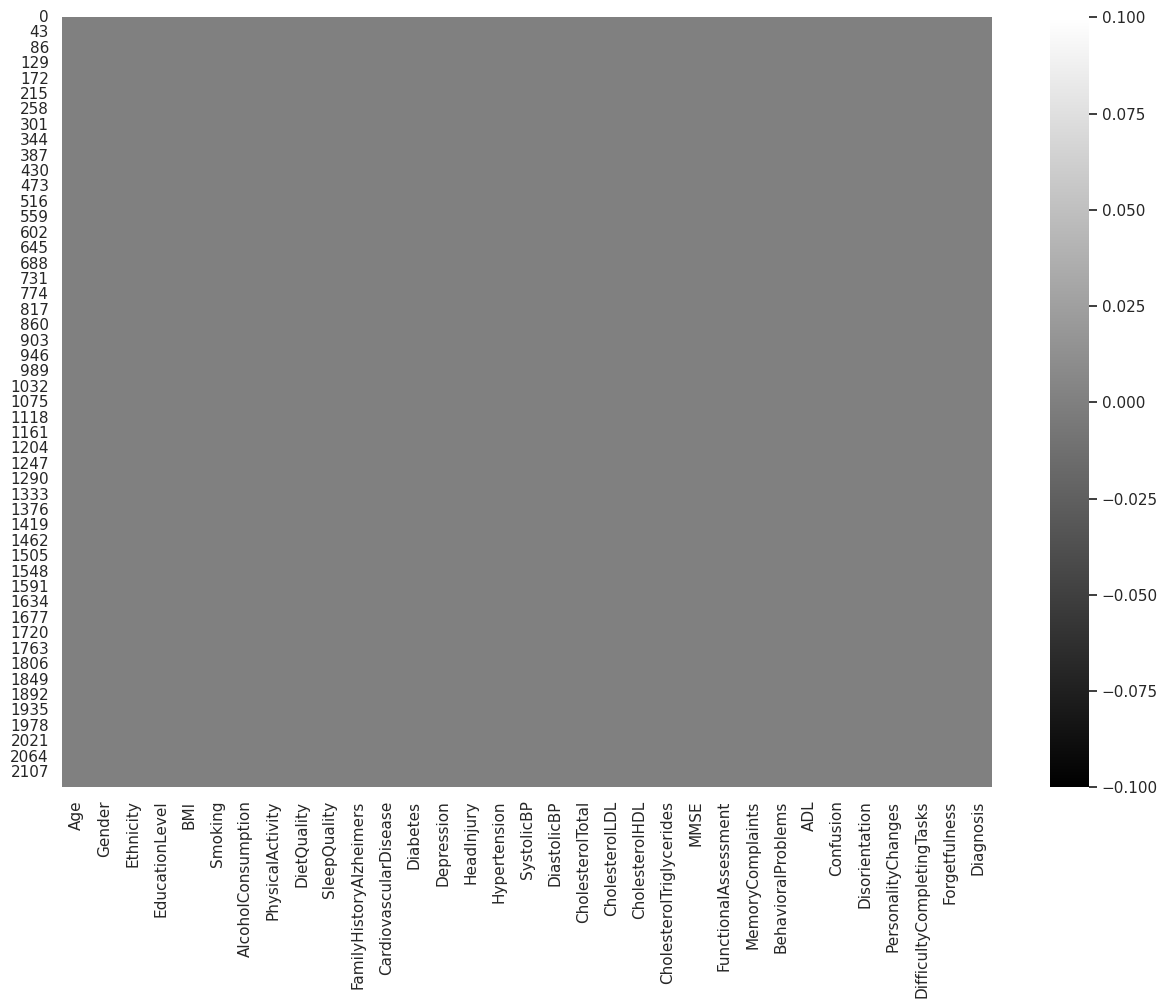

In [7]:
plt.subplots(figsize=(15, 10))
sns.heatmap(alzheimer_df.isnull(), cmap='gray')

*No missing values found*

### Numerical Features Exploration

In [8]:
alzheimer_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346
SleepQuality,2149.0,7.051081,1.763573,4.002629,5.482997,7.115646,8.562521,9.999840
SystolicBP,2149.0,134.264774,25.949352,90.000000,112.000000,134.000000,157.000000,179.000000
DiastolicBP,2149.0,89.847836,17.592496,60.000000,74.000000,91.000000,105.000000,119.000000
CholesterolTotal,2149.0,225.197519,42.542233,150.093316,190.252963,225.086430,262.031657,299.993352
CholesterolLDL,2149.0,124.335944,43.366584,50.230707,87.195798,123.342593,161.733733,199.965665


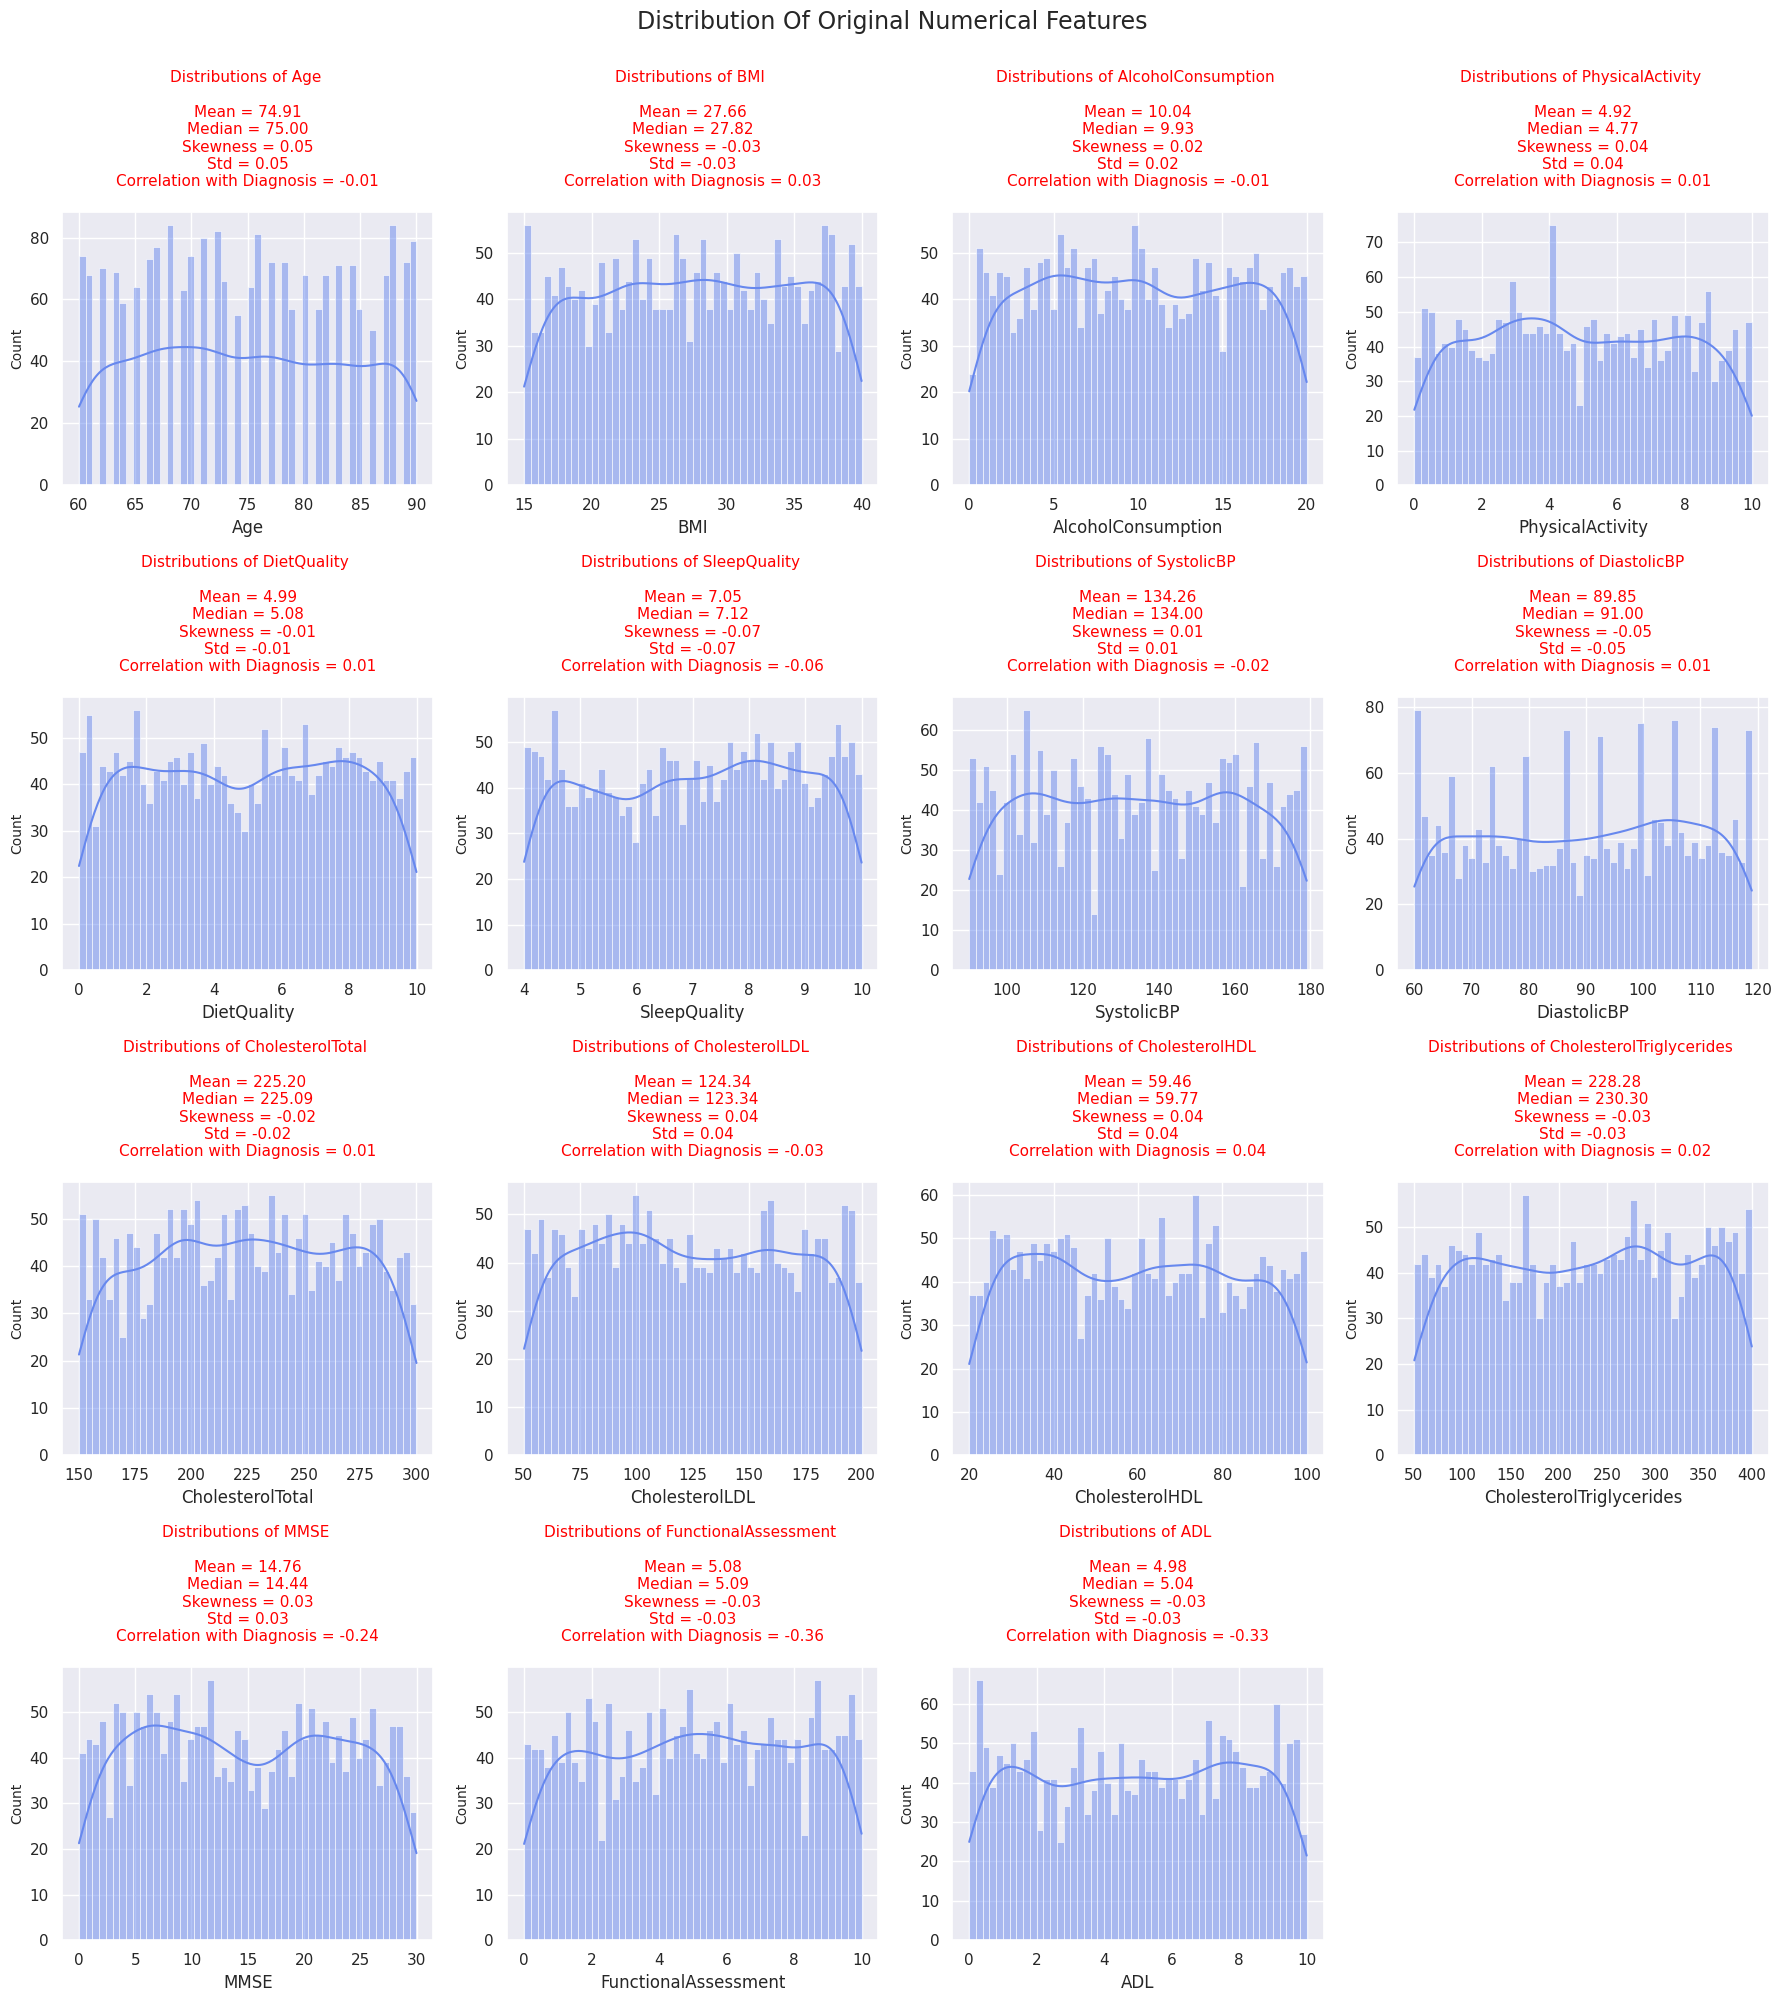

In [9]:

skewness = alzheimer_df[numerical_features].skew()
mean = alzheimer_df[numerical_features].mean()
median =alzheimer_df[numerical_features].median()
std = alzheimer_df[numerical_features].std()


num_cols = 4
num_rows = (len(numerical_features) + num_cols - 1) // num_cols  # Calculate the number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))

axes = axes.ravel()

fig.suptitle("Distribution Of Original Numerical Features", y=1, fontsize=17)

for i, column in enumerate(numerical_features):

    corr_with_diagnosis = alzheimer_df[["Diagnosis", column]].corr()

    ax = axes[i]
    ax.set_ylabel("", fontsize=10)
    ax.set_title(f'Distributions of {column} \n\n'
                 f'Mean = {mean[i]:,.2f}\n'
                 f'Median = {median[i]:,.2f}\n'
                 f'Skewness = {skewness[i]:,.2f}\n'
                 f'Std = {skewness[i]:,.2f}\n'
                 f'Correlation with Diagnosis = {corr_with_diagnosis.values[0][1]:,.2f}\n',
                 fontsize=11, 
                 color='red')
    
    sns.histplot(alzheimer_df[column], ax=ax, kde=True, bins=50)


# Remove empty subplots if necessary
if len(numerical_features) < num_cols * num_rows:
    for i in range(len(numerical_features), num_cols * num_rows):
        fig.delaxes(axes[i])


plt.tight_layout() # Adjust spacing between subplots
plt.show()


### Correlation with Diagnosis

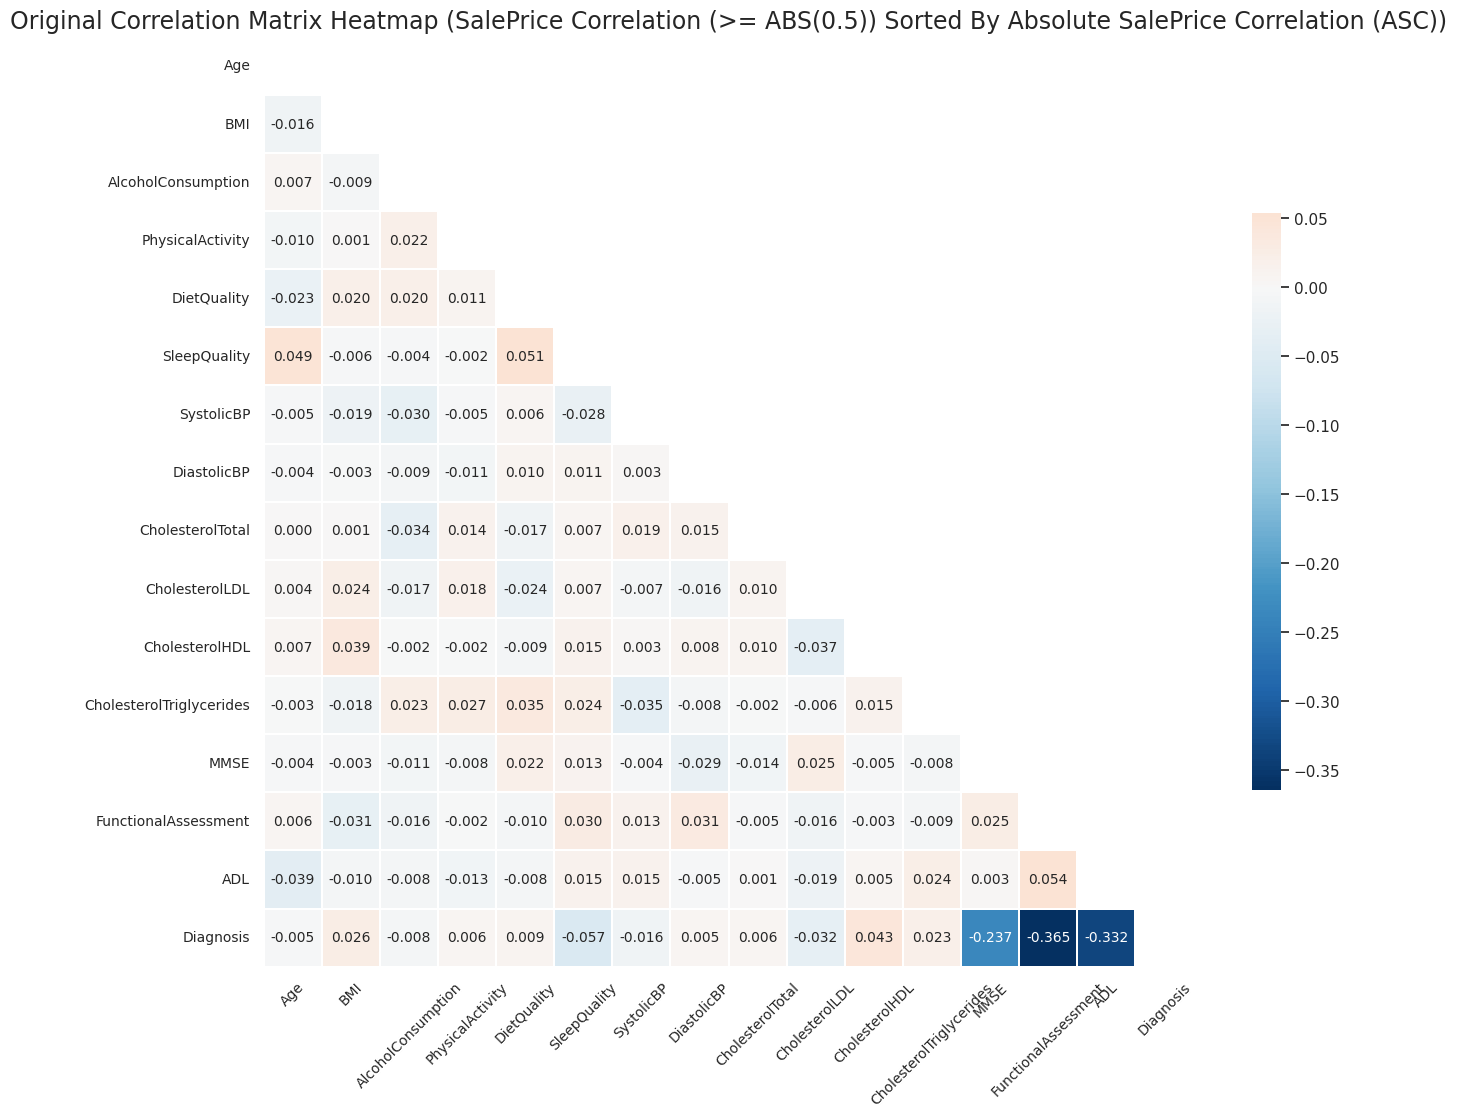

In [23]:
corr = alzheimer_df[numerical_features + ['Diagnosis']].corr()

# Create a mask to remove the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(15,15))

sns.heatmap(corr, mask=mask, cmap='RdBu_r', center=0,
            square=True, linewidths=0.01, cbar_kws={"shrink": 0.5}, 
            annot=True, fmt=".3f", annot_kws={"fontsize": 10},
            linecolor='white', cbar=True)

# Set x and y label font size
ax.tick_params(axis='x', labelsize=10, rotation=45)
ax.tick_params(axis='y', labelsize=10, rotation=360)


plt.title("Original Correlation Matrix Heatmap (SalePrice Correlation (>= ABS(0.5)) Sorted By Absolute SalePrice Correlation (ASC))", fontsize=17)

# Remove grid lines from the upper-right triangle
ax.set_facecolor('white')
plt.show()

*Not too much feature with the high correlation*

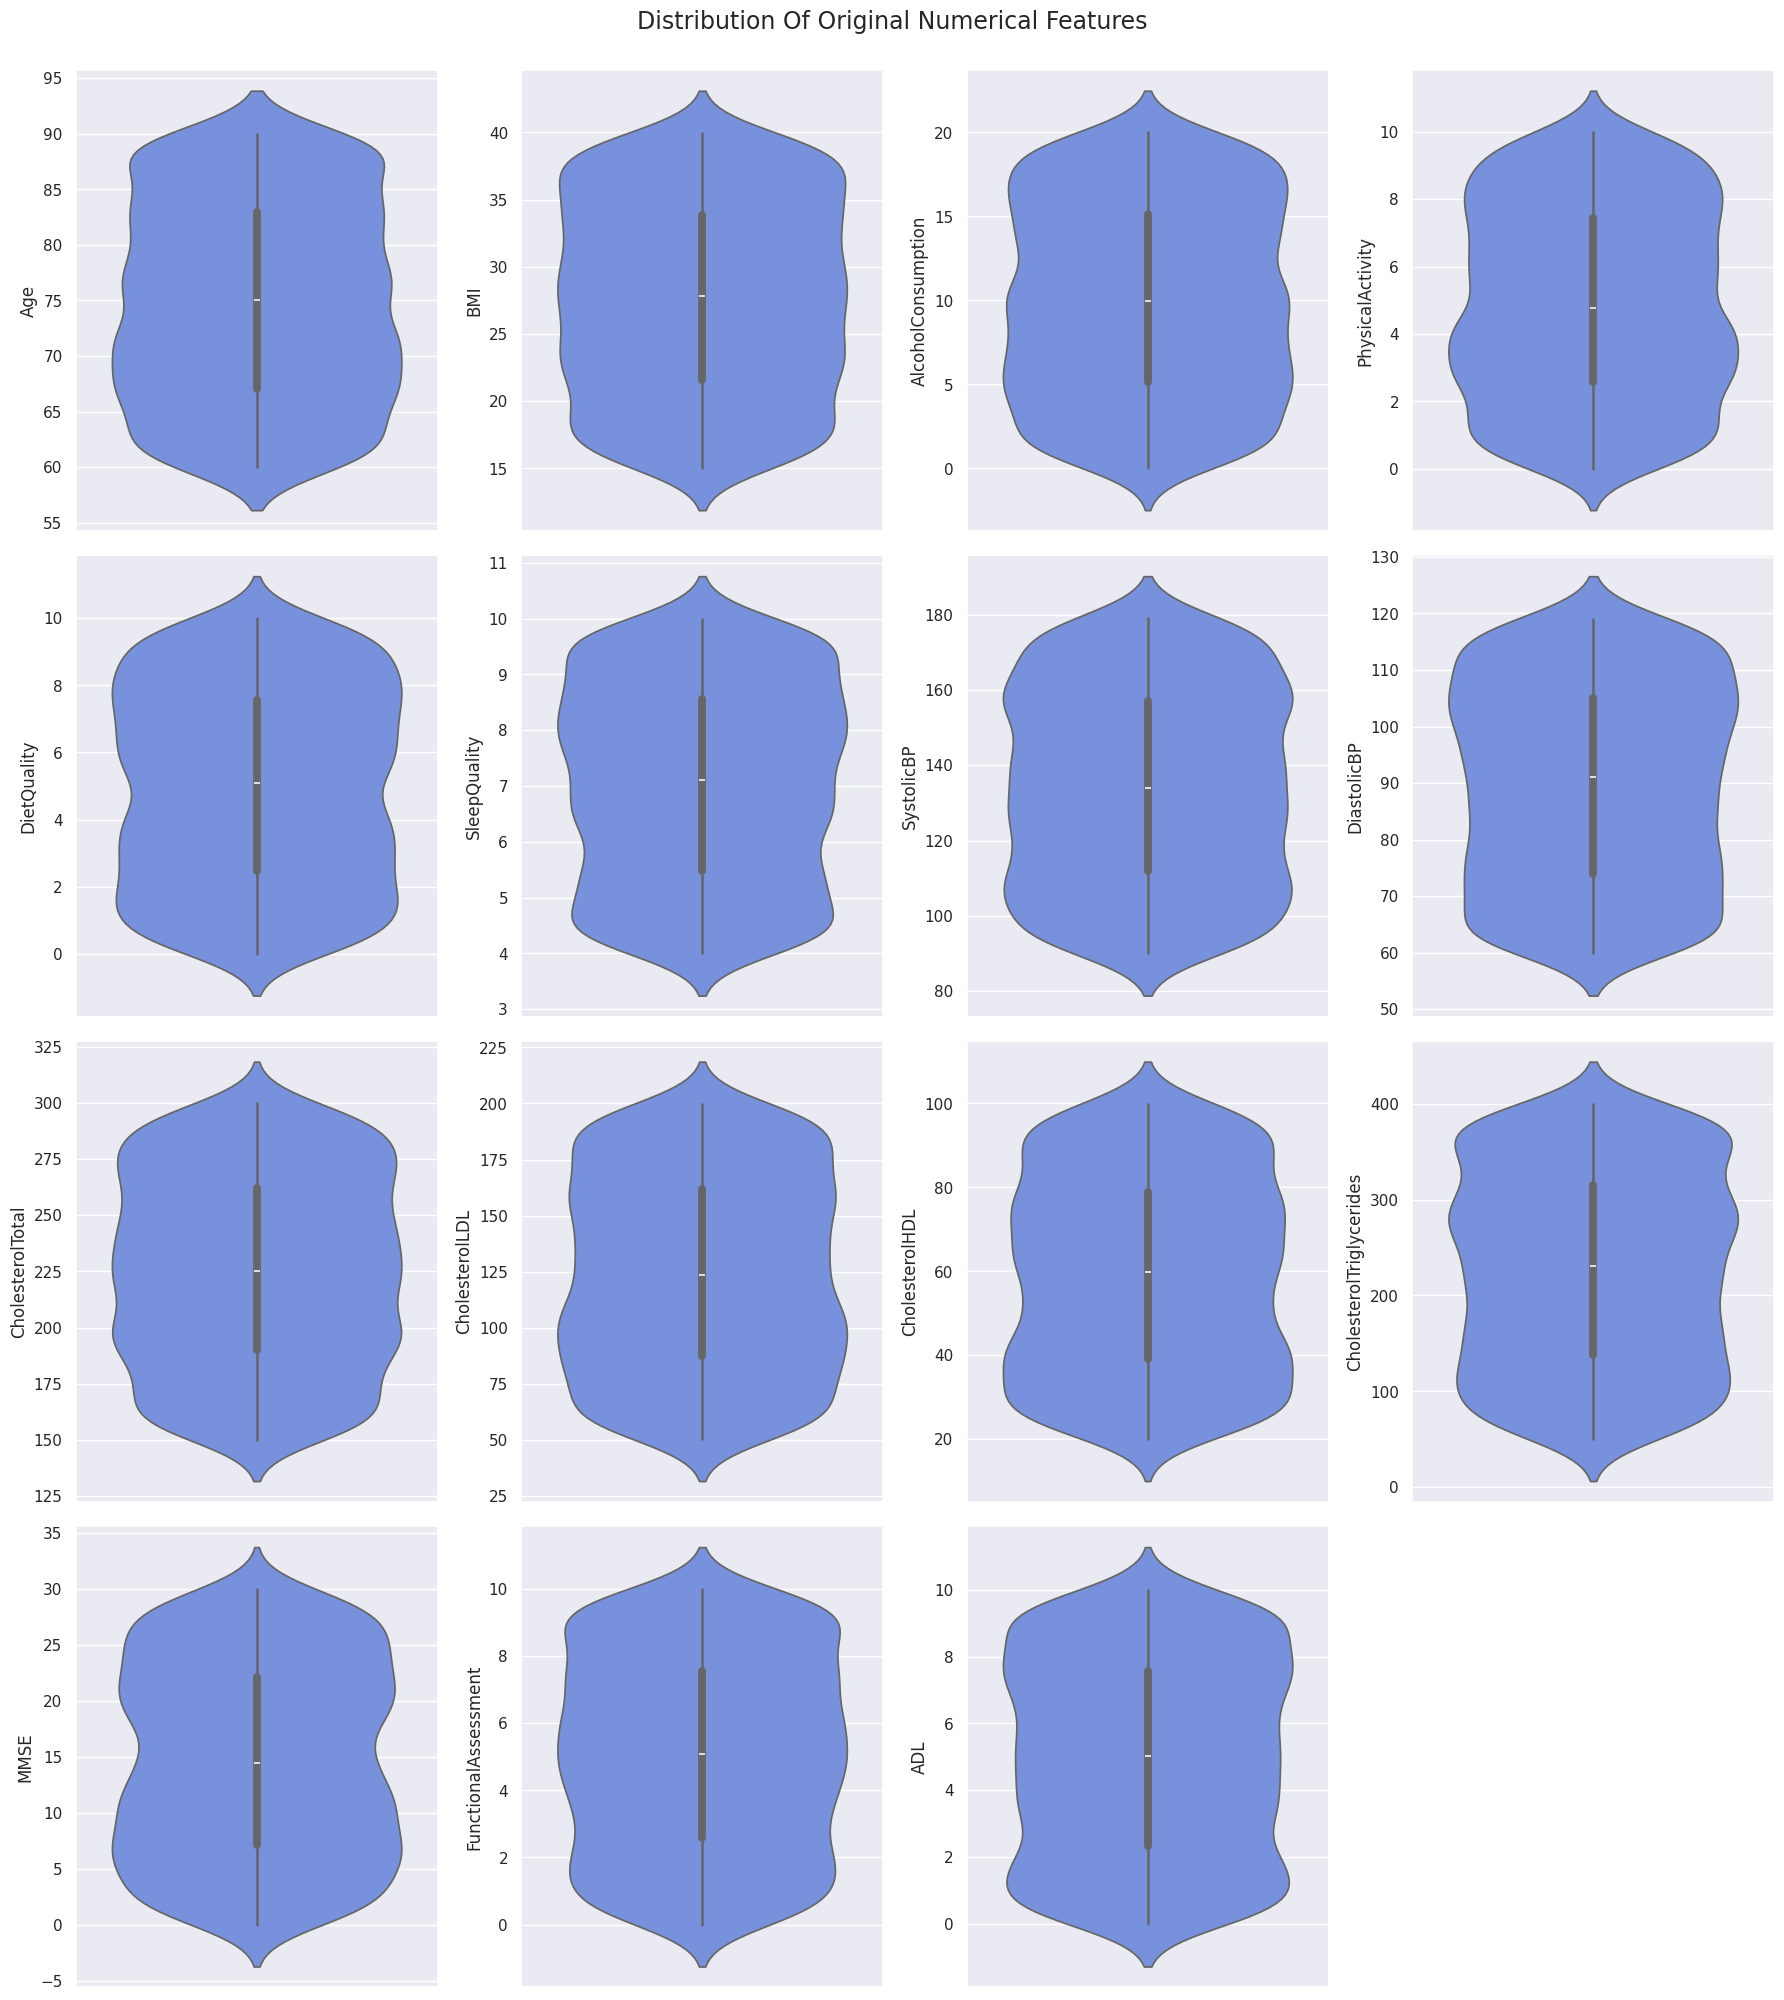

In [45]:

# skewness = alzheimer_df[numerical_features].skew()
# mean = alzheimer_df[numerical_features].mean()
# median =alzheimer_df[numerical_features].median()
# std = alzheimer_df[numerical_features].std()


num_cols = 4
num_rows = (len(numerical_features) + num_cols - 1) // num_cols  # Calculate the number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))

axes = axes.ravel()

fig.suptitle("Distribution Of Original Numerical Features", y=1, fontsize=17)

for i, column in enumerate(numerical_features):

    corr_with_diagnosis = alzheimer_df[["Diagnosis", column]].corr()

    ax = axes[i]    
    sns.violinplot(alzheimer_df[column], ax=ax)


# Remove empty subplots if necessary
if len(numerical_features) < num_cols * num_rows:
    for i in range(len(numerical_features), num_cols * num_rows):
        fig.delaxes(axes[i])


plt.tight_layout() # Adjust spacing between subplots
plt.show()


### Categorical features Exploration

In [11]:
alzheimer_df.describe(include='category').transpose()

,count,unique,top,freq
Gender,2149,2,1,1088
Ethnicity,2149,4,0,1278
EducationLevel,2149,4,1,854
Smoking,2149,2,0,1529
FamilyHistoryAlzheimers,2149,2,0,1607
CardiovascularDisease,2149,2,0,1839
Diabetes,2149,2,0,1825
Depression,2149,2,0,1718
HeadInjury,2149,2,0,1950
Hypertension,2149,2,0,1829


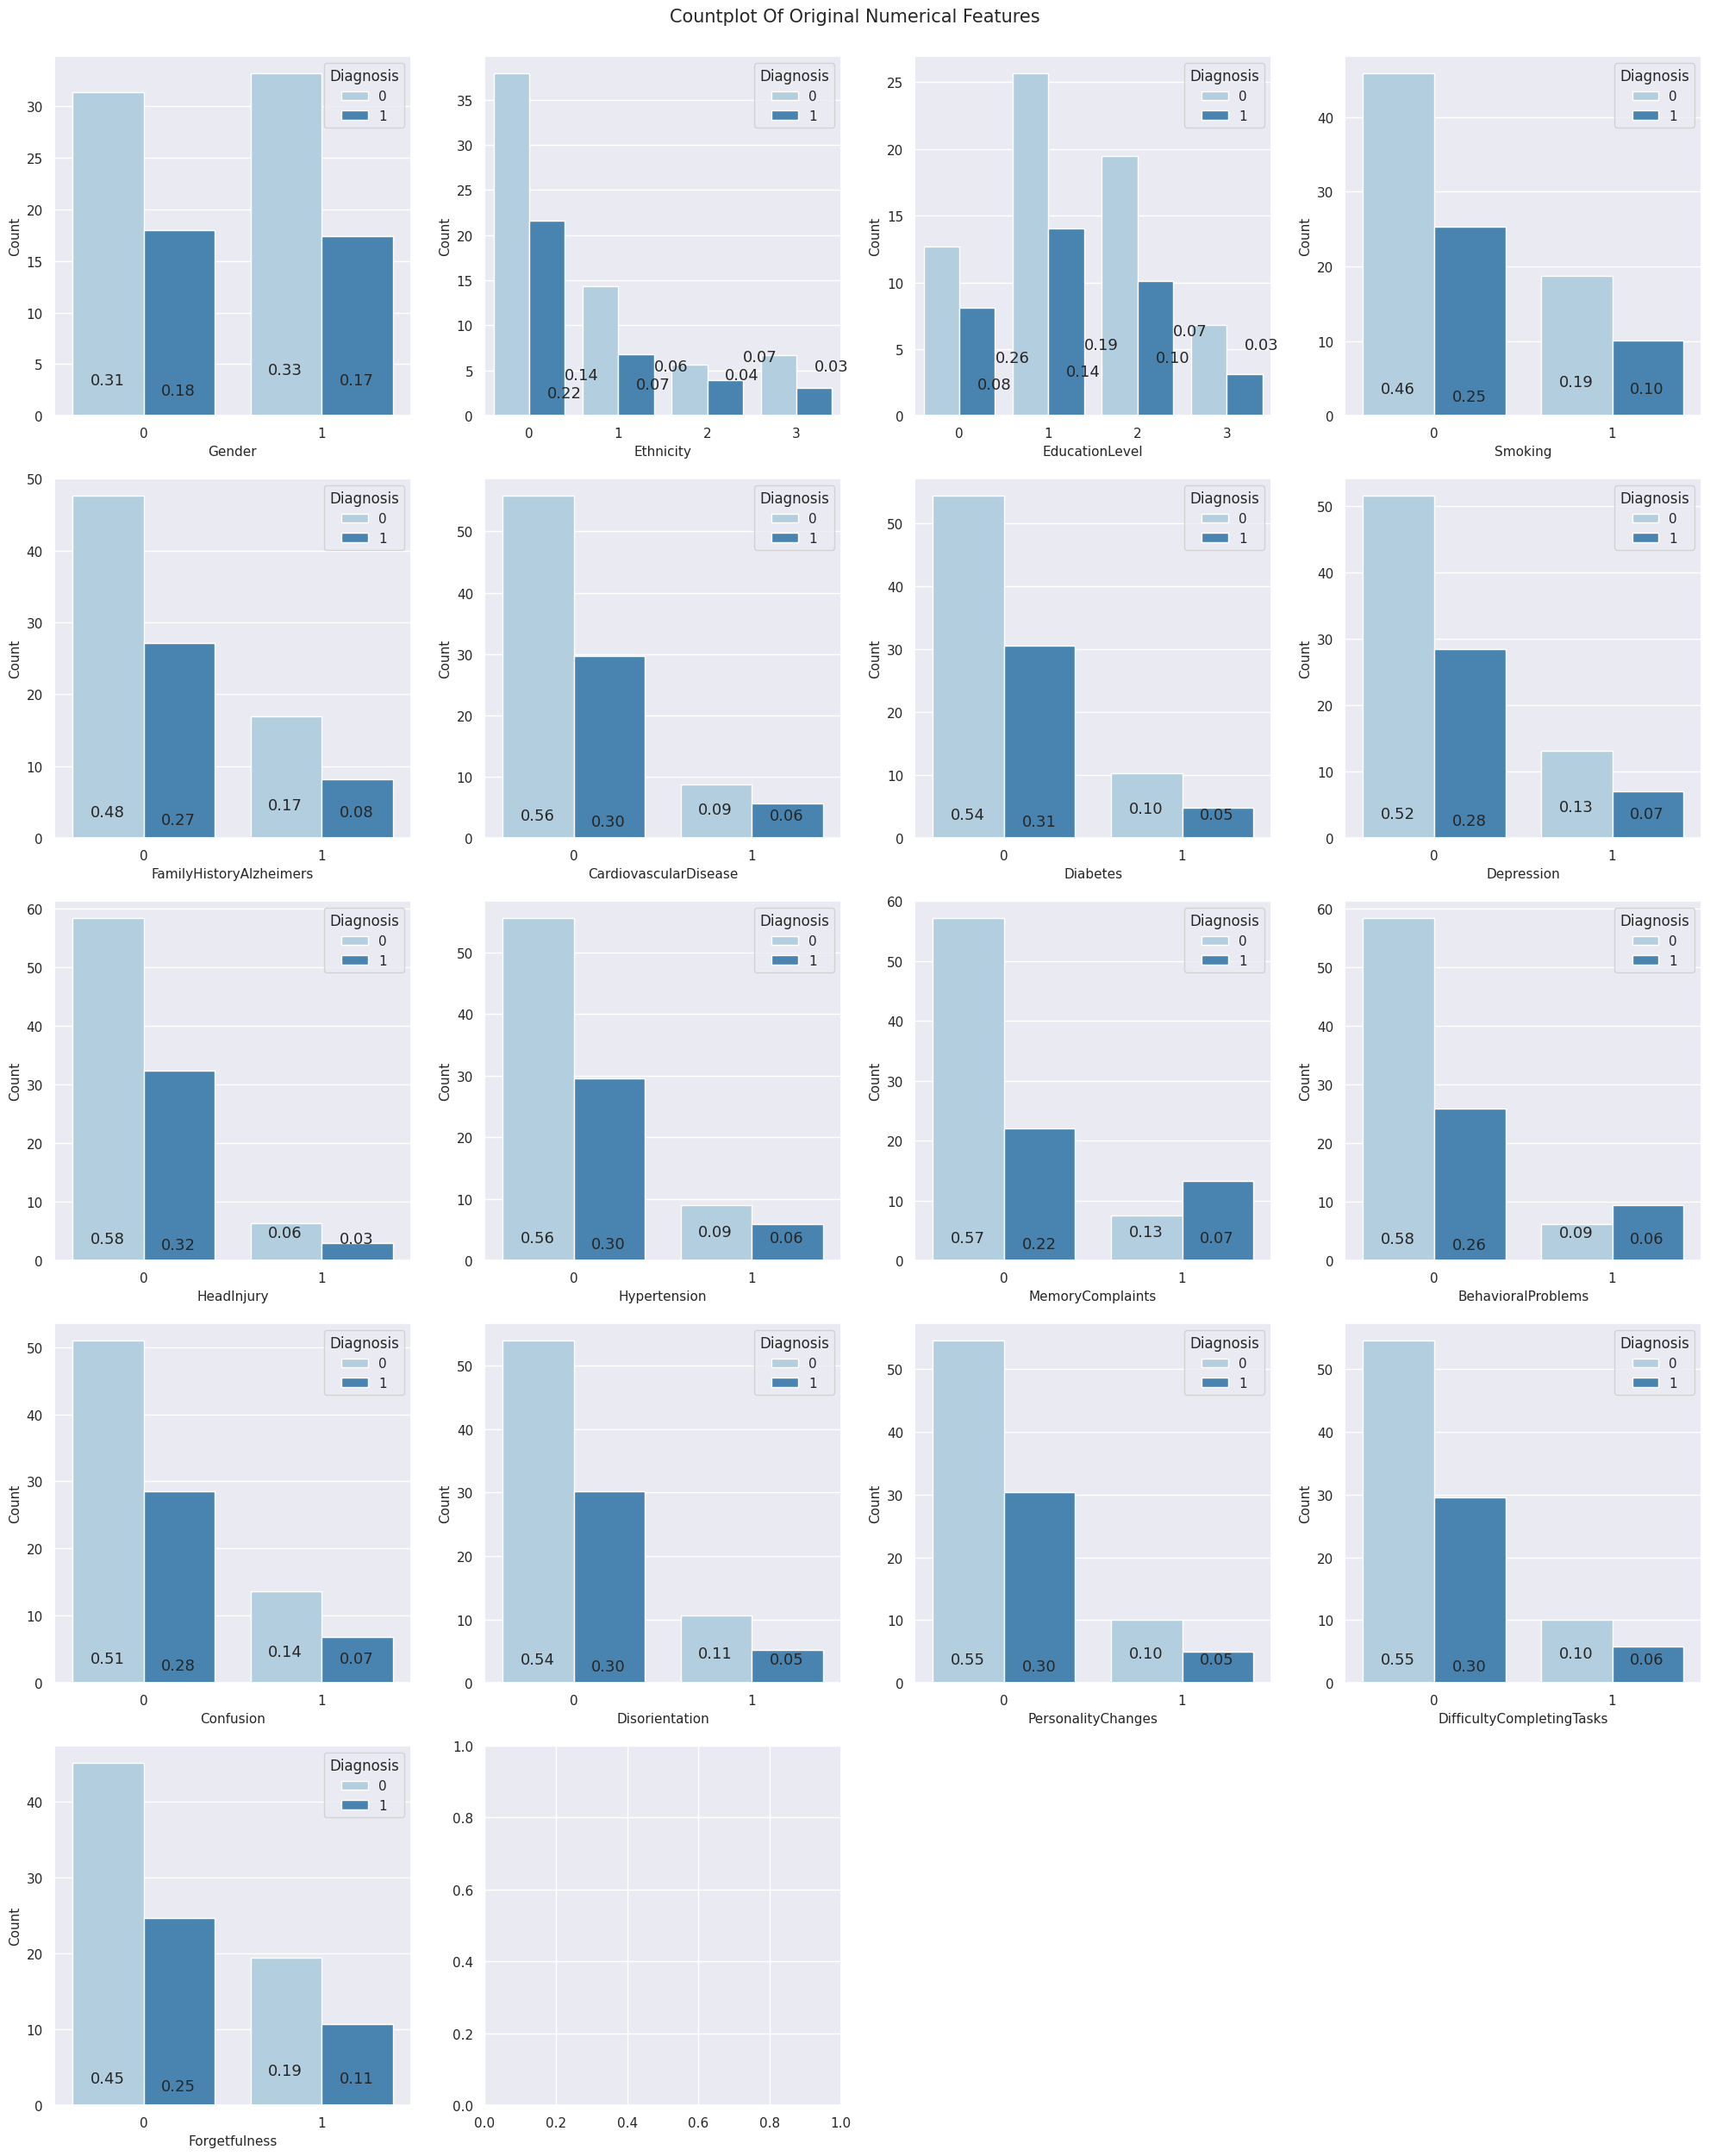

In [12]:

num_cols = 4
num_rows = (len(categorical_features) + num_cols - 1) // num_cols  # Calculate the number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))

axes = axes.ravel()

fig.suptitle("Countplot Of Original Numerical Features", y=1, fontsize=15)


for i, column in enumerate(categorical_features):

    if column == "Diagnosis":
        continue

    ax = axes[i]
    sns.countplot(data=alzheimer_df, 
                  x=column, ax=ax, 
                  palette='Blues', 
                  hue=alzheimer_df['Diagnosis'], 
                  stat='percent')
    
    # Denote proportion of hue
    discrete_values = alzheimer_df[[column,'Diagnosis']].value_counts(normalize=True)
    discrete_values = discrete_values.reset_index()
    discrete_values = discrete_values.set_index(column)

    range_of = discrete_values.shape[0] // 2
    for i in range(range_of):

        # x_range = ax.get_xlabel
        # Let's find the way or some code that can adjust the text label along with its own scale, trust you too.
        
        ax.annotate(f'{discrete_values.loc[i]['proportion'].values[0]:,.2f}', xy=(i - 0.15 * range_of ,i + 3), fontsize=13)
        ax.annotate(f'{discrete_values.loc[i]['proportion'].values[1]:,.2f}', xy=(i + 0.05 * range_of,i  + 2), fontsize=13)
        
    ax.set_xlabel(column, fontsize=11)
    ax.set_ylabel('Count', fontsize=11)
    


# Remove empty subplots if necessary
if len(categorical_features) < num_cols * num_rows:
    for i in range(len(categorical_features), num_cols * num_rows):
        fig.delaxes(axes[i])


plt.tight_layout() # Adjust spacing between subplots
plt.show()


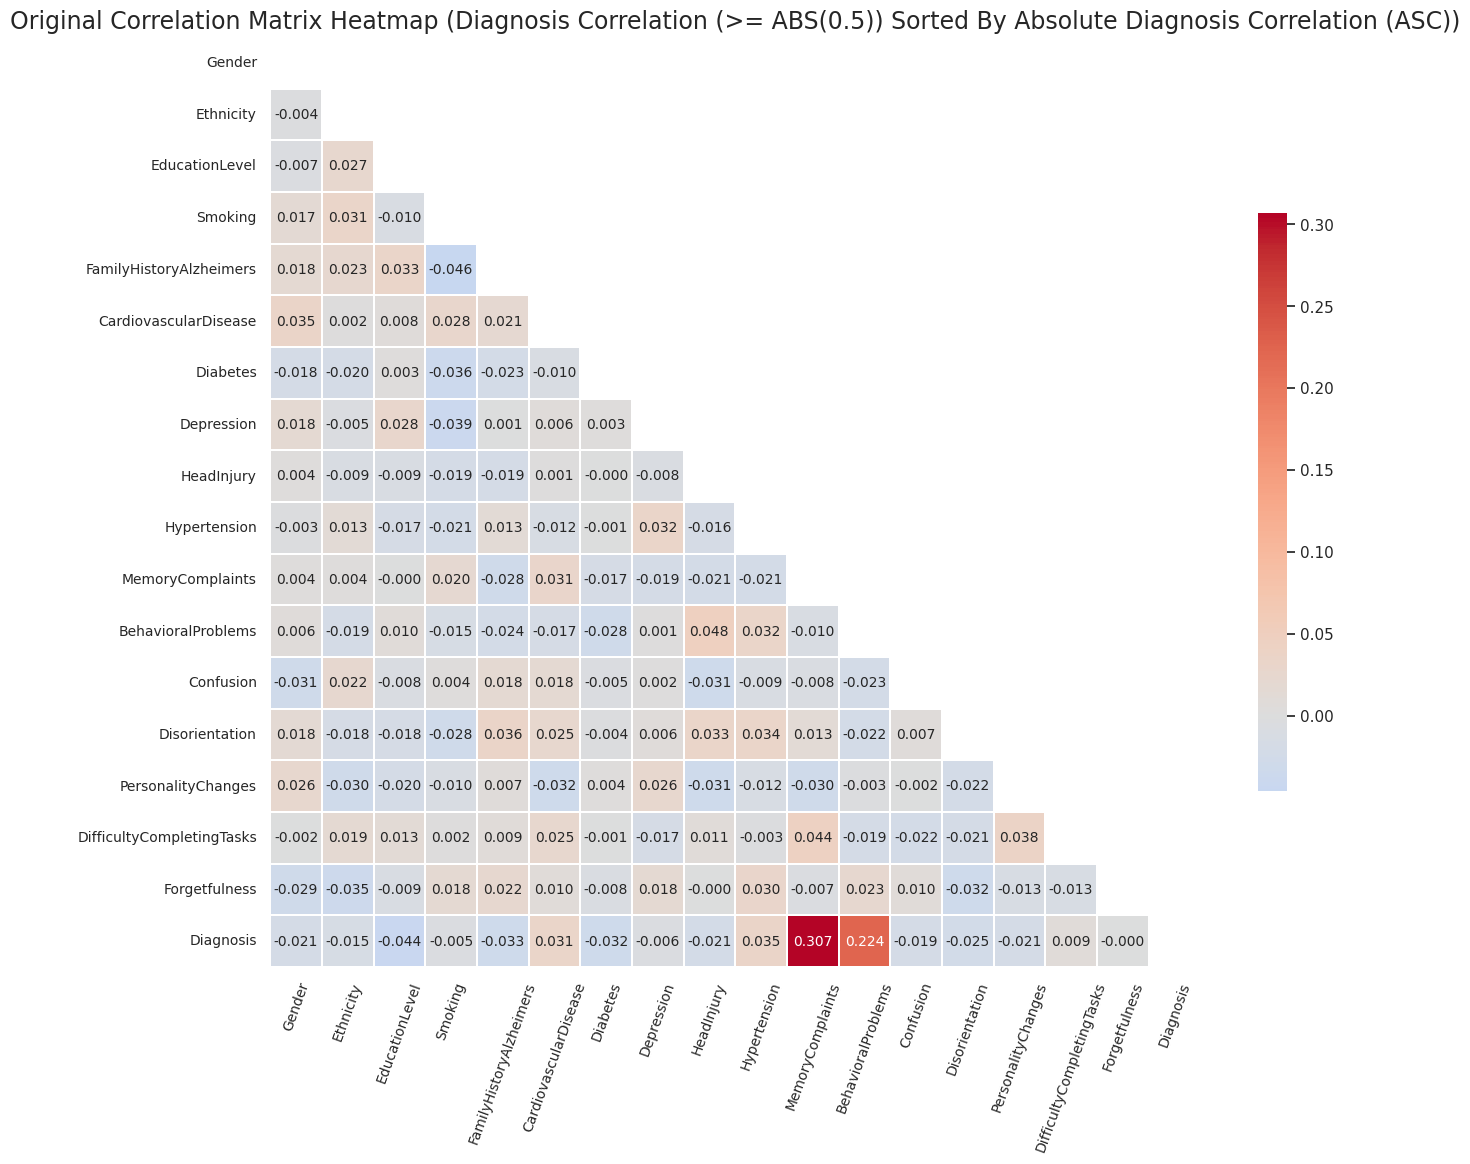

In [285]:
corr = alzheimer_df[categorical_features].corr()

# Create a mask to remove the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(15,15))

sns.heatmap(corr, mask=mask, cmap='coolwarm', center=0,
            square=True, linewidths=0.01, cbar_kws={"shrink": 0.5}, 
            annot=True, fmt=".3f", annot_kws={"fontsize": 10},
            linecolor='white', cbar=True)

# Set x and y label font size
ax.tick_params(axis='x', labelsize=10, rotation=70)
ax.tick_params(axis='y', labelsize=10, rotation=360)


plt.title("Original Correlation Matrix Heatmap (Diagnosis Correlation (>= ABS(0.5)) Sorted By Absolute Diagnosis Correlation (ASC))", fontsize=17)

# Remove grid lines from the upper-right triangle
ax.set_facecolor('white')
plt.show()

## Diagnosis Feature Exploratory (Target)

In [14]:
alzheimer_df['Diagnosis'].value_counts()


Diagnosis
0    1389
1     760
Name: count, dtype: int64

## Preprocessing Data

In [15]:
X = alzheimer_df.drop(columns={'Diagnosis'})
y = alzheimer_df[['Diagnosis']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24, test_size=0.2)

### Rescaling Numerical Features

In [16]:
scalar = StandardScaler()

X_train[numerical_features] = scalar.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scalar.transform(X_test[numerical_features])

In [17]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1719.0,-4.546812e-16,1.000291,-1.632040,-0.858176,-0.084313,0.910655,1.684518
BMI,1719.0,2.521414e-16,1.000291,-1.730587,-0.859530,0.031992,0.866127,1.694605
AlcoholConsumption,1719.0,-1.550050e-16,1.000291,-1.739898,-0.852769,-0.018474,0.893505,1.715682
PhysicalActivity,1719.0,2.046065e-16,1.000291,-1.720415,-0.832827,-0.039091,0.876590,1.765957
DietQuality,1719.0,1.839392e-16,1.000291,-1.702795,-0.876829,0.007075,0.878838,1.720900
SleepQuality,1719.0,2.190737e-16,1.000291,-1.740707,-0.885486,0.041619,0.852890,1.662806
SystolicBP,1719.0,4.061130e-16,1.000291,-1.725278,-0.872415,-0.019552,0.872077,1.724940
DiastolicBP,1719.0,3.895791e-16,1.000291,-1.690993,-0.895819,0.012952,0.864925,1.660099
CholesterolTotal,1719.0,-2.686753e-17,1.000291,-1.734113,-0.837930,-0.003166,0.876878,1.769231
CholesterolLDL,1719.0,3.306772e-16,1.000291,-1.730163,-0.853445,-0.027337,0.852868,1.754044


### Feature Engineering 

## Modeling

In [214]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, StackingClassifier, VotingClassifier

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

svc = SVC()
naive = GaussianNB()
logistic = LogisticRegression()
forest = RandomForestClassifier()
tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()
ada = AdaBoostClassifier()

light = LGBMClassifier()
cat = CatBoostClassifier()

base_models = [svc, naive, logistic, forest, tree, knn, ada, light]


In [215]:
classification_reports = {}
confusion_matrixes = {}

for model in base_models:

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    classification_reports[model.__class__.__name__ ] = classification_report(y_pred, y_test)
    confusion_matrixes[model.__class__.__name__ ] = (confusion_matrix(y_pred, y_test))
    

[LightGBM] [Info] Number of positive: 530, number of negative: 974
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000357 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3299
[LightGBM] [Info] Number of data points in the train set: 1504, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.352394 -> initscore=-0.608534
[LightGBM] [Info] Start training from score -0.608534


### Confusion matrixes

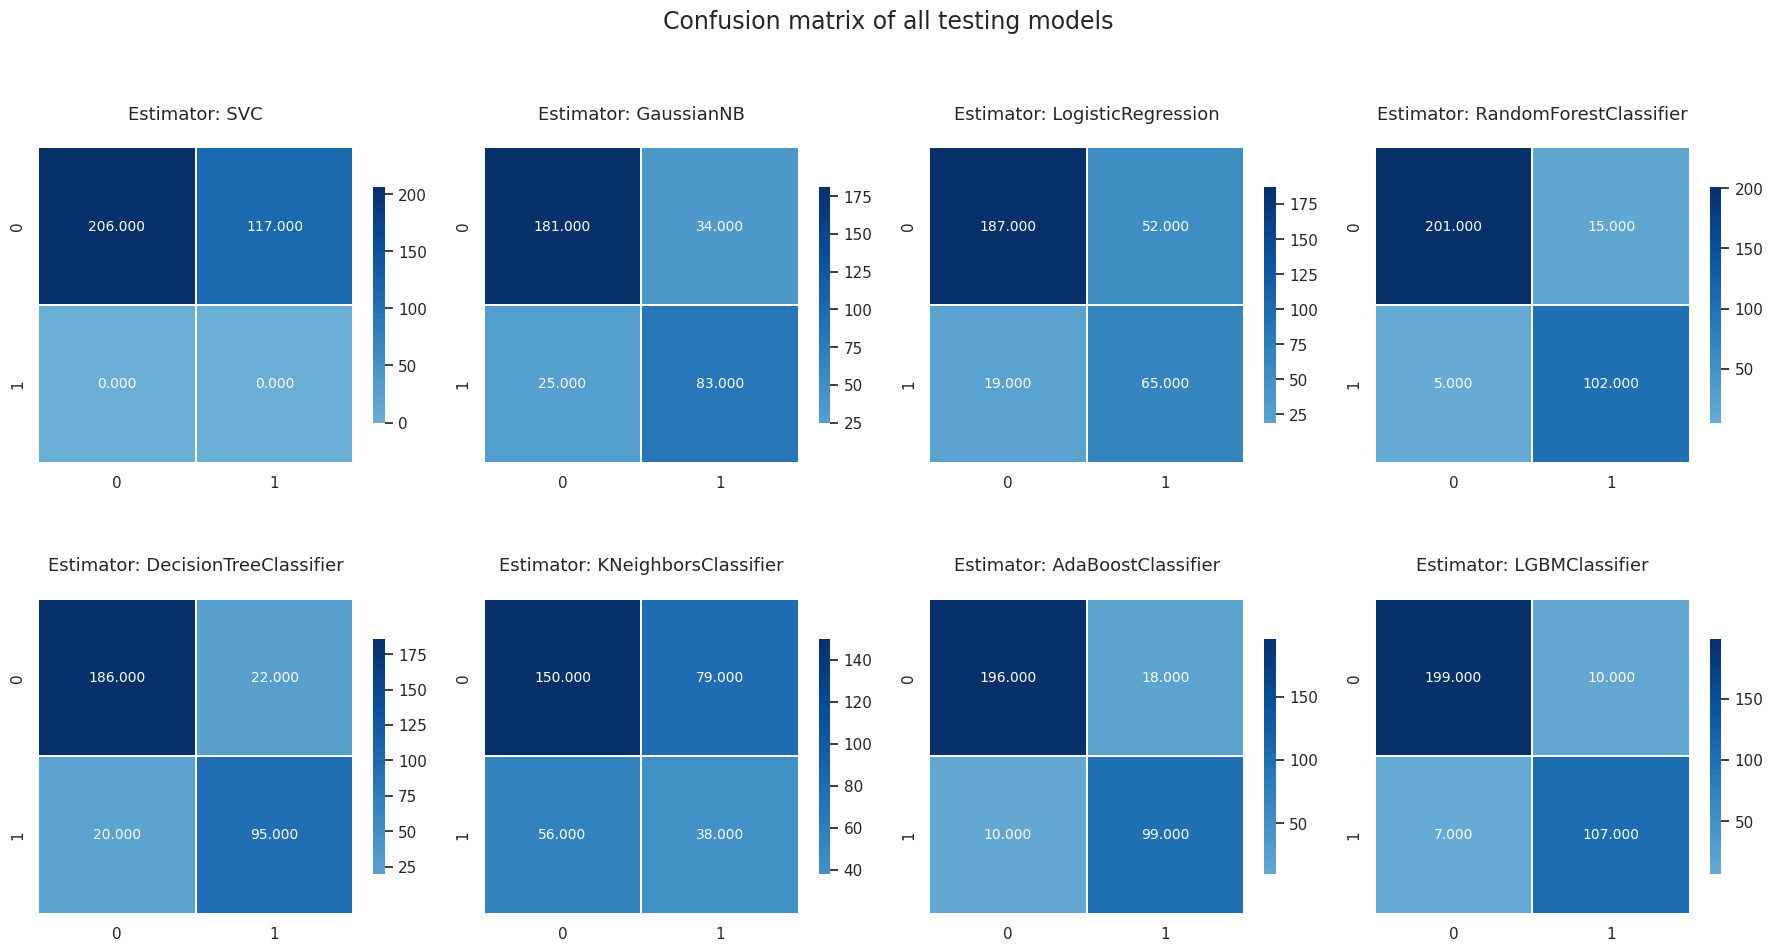

In [216]:
num_cols = 4
num_rows = (len(confusion_matrixes) + num_cols - 1) // num_cols  # Calculate the number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))

axes = axes.ravel()

fig.suptitle("Confusion matrix of all testing models ", y=1, fontsize=17)

for i, model_name in enumerate(confusion_matrixes):

    ax = axes[i]

    sns.heatmap(confusion_matrixes[model_name],  cmap='Blues', center=0,
                square=True, linewidths=0.01, cbar_kws={"shrink": 0.5}, 
                annot=True, fmt=".3f", annot_kws={"fontsize": 10},
                linecolor='white', cbar=True, ax=ax)


    ax.set_title(f"Estimator: {model_name}", fontsize=13,pad=20)


# Remove empty subplots if necessary
if len(confusion_matrixes) < num_cols * num_rows:
    for i in range(len(confusion_matrixes), num_cols * num_rows):
        fig.delaxes(axes[i])


plt.tight_layout() # Adjust spacing between subplots
plt.show()

### Classification reports

In [284]:
df_reports = pd.DataFrame()
df_break = pd.DataFrame([0]).transpose()

for model_name, report in classification_reports.items():

    df_report = pd.DataFrame([line.split(' '*6) for line in report.split('\n')], 
                columns=['Metric','Class', 'Precision', 'Recall', 'F1score', 'support']).dropna()
    df_report = pd.concat([df_report,df_break])
    df_report['Model_name'] = pd.Series([model_name]*6)
    df_report.set_index(['Model_name', 'Metric'],inplace=True,)
    df_report.fillna(' ', inplace=True)
    df_report.reset_index()

    df_reports = pd.concat([df_reports,df_report])


df_reports.drop(columns={0}, inplace=True)
df_reports


Class Precision Recall  F1score support
Model_name             Metric                                                
SVC                                       0      1.00   0.64     0.78     323
                                          1      0.00   0.00     0.00       0
                           accuracy                              0.64     323
                       NaN                                                   
GaussianNB                                0      0.88   0.84     0.86     215
                                          1      0.71   0.77     0.74     108
                           accuracy                              0.82     323
                       NaN                                                   
LogisticRegression                        0      0.91   0.78     0.84     239
                                          1      0.56   0.77     0.65      84
                           accuracy                              0.78     323
                       NaN                                                   
RandomForestClassifier                    0      0.98   0.93     0.95     216
                                          1      0.87   0.95     0.91     107
                           accuracy                              0.94     323
                       NaN                                                   
DecisionTreeClassifier                    0      0.90   0.89     0.90     208
                                          1      0.81   0.83     0.82     115
                           accuracy                              0.87     323
                       NaN                                                   
KNeighborsClassifier                      0      0.73   0.66     0.69     229
                                          1      0.32   0.40     0.36      94
                           accuracy                              0.58     323
                       NaN                                                   
AdaBoostClassifier                        0      0.95   0.92     0.93     214
                                          1      0.85   0.91     0.88     109
                           accuracy                              0.91     323
                       NaN                                                   
LGBMClassifier                            0      0.97   0.95     0.96     209
                                          1      0.91   0.94     0.93     114
                           accuracy                              0.95     323
                       NaN

*Top 5 base model*

- RandomForestClassifier
- AdaBoostClassifier
- LGBClassifier
- GaussianNB
- DecisionTree
- logisticRegression

### XGBoost

In [61]:
xgb = XGBClassifier()

param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.9],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0, 0.01, 0.1, 1],
    'scale_pos_weight': [1, 2, 5]
}

grid_search = GridSearchCV(xgb, 
                           param_grid=param_grid,
                           verbose=True,
                           scoring='roc_auc',
                           cv=5,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

In [60]:
y_pred = grid_search.best_estimator_.predict(X_test)

confusion_mx = confusion_matrix(y_pred, y_test)

sns.heatmap(confusion_matrixes[model_name],  cmap='Blues', center=0,
                square=True, linewidths=0.01, cbar_kws={"shrink": 0.5}, 
                annot=True, fmt=".3f", annot_kws={"fontsize": 10},
                linecolor='white', cbar=True, ax=ax)

print(classification_report(y_pred, y_test))


### Random Forest

In [ ]:
random_forest = RandomForestClassifier()

params = {
    'n_estimators': [50, 200, 300, 500, 1000],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2,0.4, 0.5],
    'max_features': ['sqrt', 'log2', None],
    'max_leaf_nodes': [None, 10, 20, 30, 50],
    'max_samples': [None, 0.5, 0.75, 1.0]}

random_search = RandomizedSearchCV(random_forest,
                                   param_distributions=params,
                                   n_iter=50,
                                   scoring='roc_auc',
                                   cv=5,
                                   verbose=3,
                                   random_state=42,
                                   n_jobs=-1)

random_search.fit(X_train, y_train)

In [ ]:
y_pred = random_search.best_estimator_.predict(X_test)

confusion_mx = confusion_matrix(y_pred, y_test)

sns.heatmap(confusion_matrixes[model_name],  cmap='Blues', center=0,
                square=True, linewidths=0.01, cbar_kws={"shrink": 0.5}, 
                annot=True, fmt=".3f", annot_kws={"fontsize": 10},
                linecolor='white', cbar=True, ax=ax)

print(classification_report(y_pred, y_test))

## Artificial Neural Network

In [176]:
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Dropout




In [177]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X,y, train_size=0.7, random_state=16)
X_val, X_test, y_val, y_test = train_test_split(X_holdout, y_holdout, test_size=0.5, random_state=10)

X_train.shape, X_test.shape


((1504, 32), (323, 32))

In [179]:
nn_model = keras.Sequential()
nn_model.add(keras.layers.Dense(1024, activation='relu', input_shape=(X_train.shape[1],)))
nn_model.add(keras.layers.Dense(512, activation='relu'))
nn_model.add(keras.layers.Dense(256, activation='relu'))
nn_model.add(keras.layers.Dense(128, activation='relu'))
nn_model.add(keras.layers.Dense(64, activation='relu'))
nn_model.add(keras.layers.Dense(32, activation='relu'))
nn_model.add(keras.layers.Dropout(0.3))
nn_model.add(keras.layers.Dense(1, activation='sigmoid'))



In [181]:
nn_model.compile(optimizer='adam',
              loss='binary_crssentropy',
              metrics=['accuracy'])


In [182]:
nn_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 1024)           │        33,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 733,185 (2.80 MB)

 Trainable params: 733,185 (2.80 MB)

 Non-trainable params: 0 (0.00 B)

In [184]:
early_stop = EarlyStopping(monitor='val_loss', 
                           patience=30,
                           restore_best_weights=True)

In [185]:
history = nn_model.fit(X_train, y_train,
                       validation_data = (X_val, y_val),
                       epochs = 200,
                       batch_size= 128)

ValueError: Invalid dtype: category